## Decision Tree

In [82]:
'''loading reqired packages'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [86]:
'''importing the dataset'''
import pandas as pd
df= pd.read_excel(r"C:\Users\salah\OneDrive\Desktop\heart_disease.xlsx",sheet_name='Heart_disease')

In [88]:
df.shape

(908, 13)

In [90]:
df.head

<bound method NDFrame.head of      age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               th


## Exploratory Data Analysis

In [93]:
# checking missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [95]:
# Checking for outliers
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


## Data Visualization

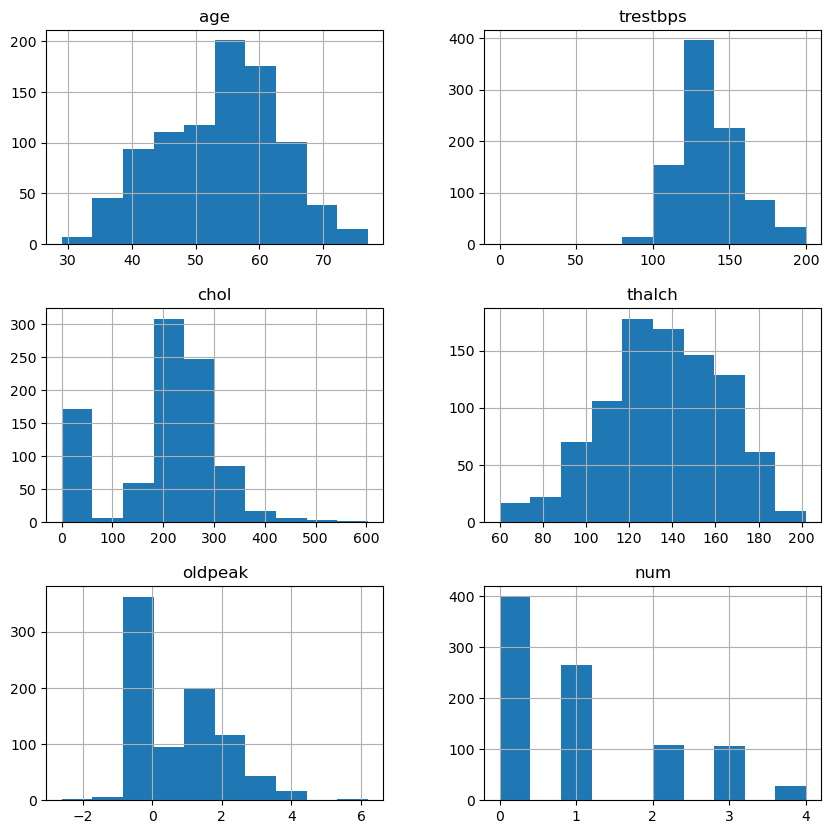

In [98]:
import matplotlib.pyplot as plt

df.hist(figsize=(10, 10), bins=10)
plt.show()

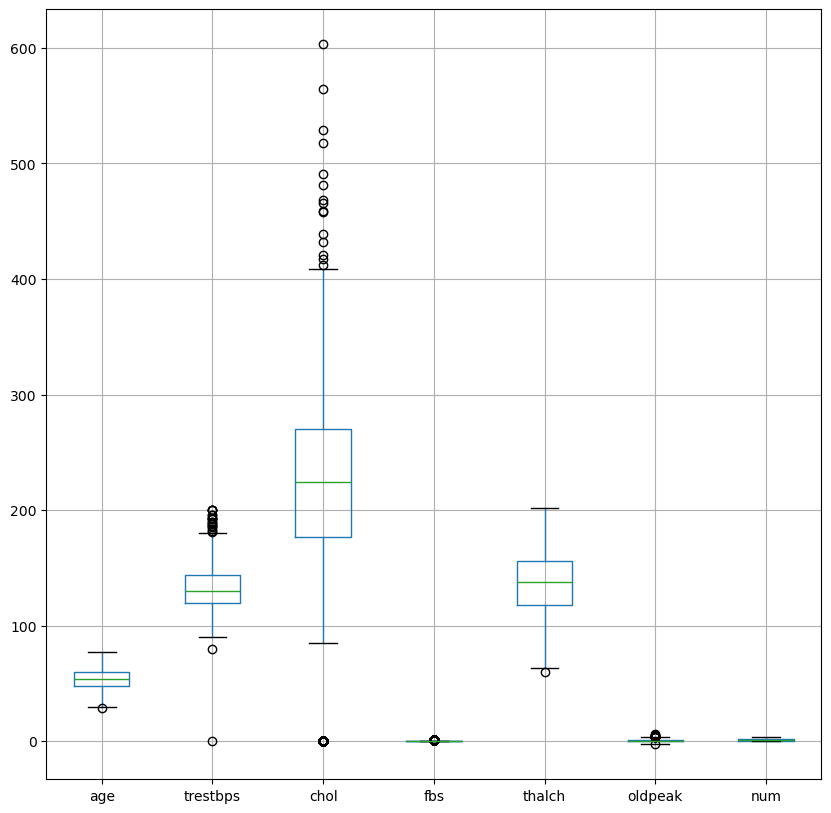

In [99]:
'''box plot'''
df.boxplot(figsize=(10, 10))
plt.show()


## correlation metrices

In [102]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [105]:
# Correlation matrix for numerical variables
num_corr = df[num_cols].corr()

In [107]:
# Display the correlation matrix
print("Correlation matrix for numerical variables:")
display(num_corr)


Correlation matrix for numerical variables:


,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


## Feature Engineering

In [110]:
# Encoding the categorical variables
df = pd.get_dummies(df, drop_first=True)

In [112]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,True,False,False,False,True,False,False,False,False,False,True,False,True
904,62,166,170,False,120,3.0,4,True,False,False,False,False,True,True,False,False,True,False,False,True
905,56,170,0,False,123,2.5,4,True,False,True,False,False,False,True,False,False,False,False,True,False
906,56,144,208,True,105,NaN,4,True,False,True,False,False,True,False,False,True,False,False,False,False


In [114]:
# Scaling numerical features

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

In [118]:
# Handling missing values

In [120]:
df.fillna(df.mean(), inplace=True)

In [122]:
# Checking for missing values
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

## Decision Tree Classification

In [125]:
# Converting the target variable to a classification variable

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [129]:
import pandas as pd
df = pd.get_dummies(df, drop_first=True)
df.isnull().sum()

age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
oldpeak                     0
num                         0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
exang_FALSE                 0
exang_TURE                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [131]:
# Spliting the dataset into training and testing 
df['num'] = (df['num'] > 0).astype(int)
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Implement a Decision Tree Classification model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Create an imputer object
imputer = SimpleImputer(strategy='mean')
# Train the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [137]:
# Evaluate the model on testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

In [139]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7417582417582418
Precision: 0.7360675039246467
Recall: 0.7417582417582418
F1 Score: 0.7387042187241366
ROC-AUC: 0.6419302514193025


## Hyperparameter Tuning


In [142]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}

In [144]:
# Create a DecisionTree Classifier instance


In [146]:
dt_clf = DecisionTreeClassifier()

In [148]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_clf, param_grid=grid, cv=5)

In [150]:
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 5, 10]})

In [152]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [154]:
# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

Best Hyperparameters:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [158]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluating the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

In [160]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)

Accuracy: 0.7197802197802198
Precision: 0.6968871748283514
Recall: 0.7197802197802198
F1 Score: 0.7056789978841945
ROC-AUC: 0.5825628548256285


## Model Evaluation and Analysis

Analyse the performance of the Decision Tree model using the evaluation metrics obtained. Visualize the decision tree structure to understand the rules learned by the model and identify important features

In [164]:
import matplotlib.pyplot as plt
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[117  20]
 [ 31  14]]


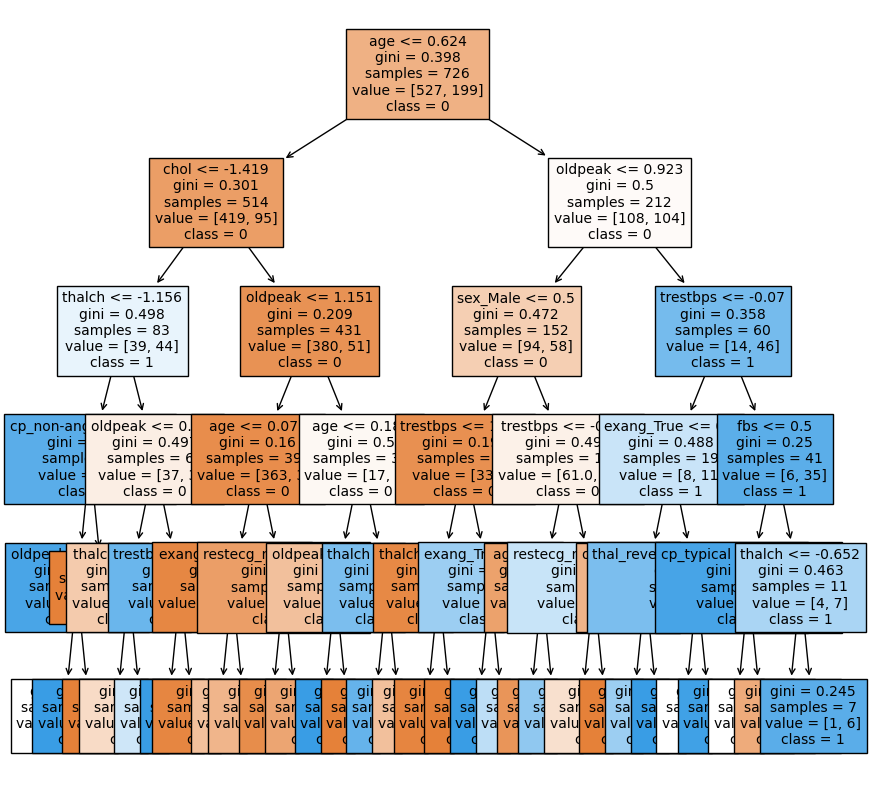

In [166]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], fontsize=10, filled=True)
plt.show()

In [168]:
# Feature importance
importance = best_model.feature_importances_
for i, feature in enumerate(X.columns):
    print(f"{feature}: {importance[i]}")

age: 0.26555928976317933
trestbps: 0.08947760650177713
chol: 0.1748235856741759
fbs: 0.01051497878445986
thalch: 0.06705735495206586
oldpeak: 0.23830877958708394
sex_Male: 0.054178074311855624
cp_atypical angina: 0.0
cp_non-anginal: 0.011720473306302583
cp_typical angina: 0.0059606203365617574
restecg_normal: 0.03981200493697792
restecg_st-t abnormality: 0.0
exang_True: 0.02399284268142653
exang_FALSE: 0.007484357175867664
exang_TURE: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_normal: 0.0
thal_reversable defect: 0.01111003198826598


## Interview Questions:

1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Decision tree models come with several hyperparameters that can significantly influence their performance. Here are some of the most common ones:

max_depth:

Description: Maximum depth of the tree.

Impact: Controls how deep the tree can grow. Shallow trees (low depth) might underfit, while very deep trees might overfit by capturing noise in the training data.

min_samples_split:

Description: Minimum number of samples required to split an internal node.

Impact: Prevents the tree from splitting nodes that have fewer samples than the specified threshold. Higher values can lead to underfitting, while lower values can cause overfitting.

min_samples_leaf:

Description: Minimum number of samples required to be at a leaf node.

Impact: Ensures that leaves contain a minimum number of samples, which can smooth the model, reduce variance, and help avoid overfitting.

max_features:

Description: Number of features to consider when looking for the best split.

Impact: Reduces complexity by limiting the number of features considered for each split. Smaller values can reduce overfitting and computational cost but might also miss important features.

criterion:

Description: Function to measure the quality of a split (commonly "gini" for Gini impurity and "entropy" for information gain).

Impact: Determines how the decision tree chooses to split nodes. Different criteria can affect the tree structure and performance.

max_leaf_nodes:

Description: Maximum number of leaf nodes in the tree.

Impact: Limits the number of leaf nodes, which can help in reducing overfitting.

min_weight_fraction_leaf:

Description: Minimum weighted fraction of the sum total of weights required to be at a leaf node.

Impact: Provides a way to ensure that leaf nodes contain a minimum fraction of the data's total weight, which can help control overfitting.

2.What is the difference between the Label encoding and One-hot encoding?

Label encoding and one-hot encoding are two popular techniques used for converting categorical data into numerical form, which can be fed into machine learning algorithms. Here's how they differ:

Label Encoding
Description: Converts categorical values into numerical values by assigning a unique integer to each category.

Usage: Suitable when there is an ordinal relationship between categories (e.g., 'low', 'medium', 'high').